<a href="https://colab.research.google.com/github/saewoonam/ble_dongles/blob/master/data/examples/example_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import plotly.graph_objects as go
import requests
import json
import datetime
import csv
import codecs
import urllib
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/saewoonam/ble_dongles/master/data/example/ch_mask.data'
df = pd.read_csv(url, error_bad_lines=False)

In [0]:
timestamp = df['local_time']
rssi = df[' rssi']
rpi = df[' remote_adv']

In [0]:
def plot_rssi(timestamp, rssi, rpi):
    # compute histogram fast
    hist = np.array(np.unique(rssi, return_counts=True)).T


    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(16, 8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)

    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    ch37_bool = [];
    ch38_bool = [];
    ch39_bool = [];
    for r in rpi:
        ch37_bool.append(r[-6]=='C')
        ch38_bool.append(r[-6]=='A')
        ch39_bool.append(r[-6]=='6')
    ax_scatter.plot(timestamp[ch37_bool], rssi[ch37_bool]-0.2,'b.',  markersize=.1)
    ax_scatter.plot(timestamp[ch38_bool], rssi[ch38_bool],'g.',  markersize=.1)
    ax_scatter.plot(timestamp[ch39_bool], rssi[ch39_bool]+0.2,'r.',  markersize=.1)
    hist37 = np.array(np.unique(rssi[ch37_bool], return_counts=True)).T
    hist38 = np.array(np.unique(rssi[ch38_bool], return_counts=True)).T
    hist39 = np.array(np.unique(rssi[ch39_bool], return_counts=True)).T



    ax_histy.barh(hist[:,0], hist[:,1])
    ax_histy.set_ylim(ax_scatter.get_ylim())
    return ax_scatter, ax_histy

(<matplotlib.axes._axes.Axes at 0x7f079c81d748>,
 <matplotlib.axes._axes.Axes at 0x7f079c7bbba8>)

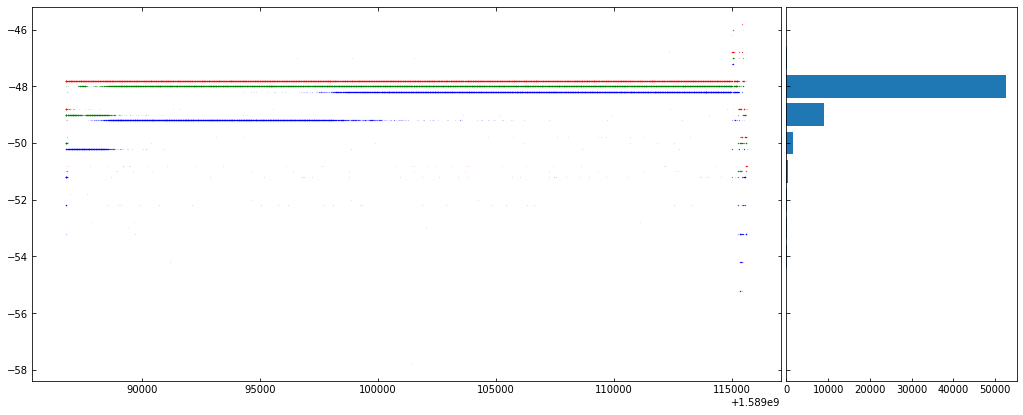

In [0]:
plot_rssi(timestamp, rssi, rpi)